## EDA And Feature Engineering Flight Price Prediction

check the dataset info below

https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

### FEATURES

The various features of the cleaned dataset are explained below:

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable stores information of the ticket price.



## Aim of this Project:-

1. The main aim of this project is to do a proper exploratory data analysis on the flight price prediction.

### Step 1 : Import all the necessary libaries

In [6616]:
### Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

plt.style.use('default')

sns.set_theme(style="whitegrid")

### OBSERVATIONS:

1. Here we are importing all the necessary libraries

2. using set_option() -----> It tells the Pandas to print all the columns of the dataframe.

3. style -------------------> It tells the Pnadas to print the default style.

4. set_theme(style="whitegrid") -----> It tells the Pandas to set up the white grid or white background.

### Step 2: Basic Data Information

In [6617]:
data = pd.read_csv('flight_price.csv')

In [6618]:
print(data)

           Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India        1/5/2019   Kolkata    Banglore   
2      Jet Airways        9/6/2019     Delhi      Cochin   
3           IndiGo       12/5/2019   Kolkata    Banglore   
4           IndiGo        1/3/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia        9/4/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara        1/3/2019  Banglore   New Delhi   
10682    Air India        9/5/2019     Delhi      Cochin   

                       Route Dep_Time    Arrival_Time Duration Total_Stops  \
0                  BLR ? DEL    22:20  3/22/2025 1:10   2h 50m    non-stop   
1      CCU ? IXR ? BBI ? BLR     5:50           13:15   7h 25m     2 stops   
2      DEL ? LKO ? BOM ? COK     9:25  6/10/2

In [6619]:
## get the first five rows of the dataset

print(data.head())

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR ? DEL   
1    Air India        1/5/2019   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR   
2  Jet Airways        9/6/2019     Delhi      Cochin  DEL ? LKO ? BOM ? COK   
3       IndiGo       12/5/2019   Kolkata    Banglore        CCU ? NAG ? BLR   
4       IndiGo        1/3/2019  Banglore   New Delhi        BLR ? NAG ? DEL   

  Dep_Time    Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  3/22/2025 1:10   2h 50m    non-stop         No info   3897  
1     5:50           13:15   7h 25m     2 stops         No info   7662  
2     9:25  6/10/2025 4:25      19h     2 stops         No info  13882  
3    18:05           23:30   5h 25m      1 stop         No info   6218  
4    16:50           21:35   4h 45m      1 stop         No info  13302  


In [6620]:
## get the last five rows of the dataset

print(data.tail())

           Airline Date_of_Journey    Source Destination  \
10678     Air Asia        9/4/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara        1/3/2019  Banglore   New Delhi   
10682    Air India        9/5/2019     Delhi      Cochin   

                       Route Dep_Time Arrival_Time Duration Total_Stops  \
10678              CCU ? BLR    19:55        22:25   2h 30m    non-stop   
10679              CCU ? BLR    20:45        23:20   2h 35m    non-stop   
10680              BLR ? DEL     8:20        11:20       3h    non-stop   
10681              BLR ? DEL    11:30        14:10   2h 40m    non-stop   
10682  DEL ? GOI ? BOM ? COK    10:55        19:15   8h 20m     2 stops   

      Additional_Info  Price  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  


In [6621]:
### Get the shape of the dataset

print("Shape of the dataset :", data.shape)

Shape of the dataset : (10683, 11)


In [6622]:
### get the length of the dataset

print("Length of the dataset is:", len(data))

Length of the dataset is: 10683


In [6623]:
### get the columns used in the dataset

print(data.columns)

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


### Step 3: Summary Information about the dataset

In [6624]:
### get the information about all the columns used in the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6625]:
### get the descriptive summary statistics about the dataset

print(data.describe())

              Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000


In [6626]:
### get the descriptive summary statistics about all the categorical columns used in the dataset

print(data.describe(include=['object']))

            Airline Date_of_Journey Source Destination            Route  \
count         10683           10683  10683       10683            10682   
unique           12              40      5           6              128   
top     Jet Airways      18/05/2019  Delhi      Cochin  DEL ? BOM ? COK   
freq           3849             504   4537        4537             2376   

       Dep_Time Arrival_Time Duration Total_Stops Additional_Info  
count     10683        10683    10683       10682           10683  
unique      222         1343      368           5              10  
top       18:55        19:00   2h 50m      1 stop         No info  
freq        233          423      550        5625            8345  


### Step 4: Data Cleaning

In [6627]:
### To check for the missing values in the dataset

data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6628]:
### To find out the missing route from the dataset

data[data['Route'].isnull()]  

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/5/2019,Delhi,Cochin,NaN,9:45,5/7/2025 9:25,23h 40m,NaN,No info,7480


In [6629]:
### To find out the missing Total_Stops from the dataset

data[data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/5/2019,Delhi,Cochin,NaN,9:45,5/7/2025 9:25,23h 40m,NaN,No info,7480


### OBSERVATIONS:

1. We are having only one record of Air India for the Date of Journey 6th May 2019 that does not have any record value for Route and Total Stops.

In [6630]:
### To remove all the missing values from the dataset

data.dropna(inplace=True)

In [6631]:
### To find out the missing route from the dataset

data[data['Route'].isnull()]  

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [6632]:
### To find out the missing route from the dataset

data[data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


### OBSERVATIONS:

1. Now all the NULL records from the dataset are deleted.

In [6633]:
### To check for the duplicate records used in the dataset

data[data.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/6/2019,Delhi,Cochin,DEL ? NAG ? BOM ? COK,14:35,6/2/2025 4:25,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,22:00,5/22/2025 19:15,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL ? HYD ? BOM ? COK,17:15,5/19/2025 19:15,26h,2 stops,No info,12392
1418,Jet Airways,6/6/2019,Delhi,Cochin,DEL ? JAI ? BOM ? COK,5:30,6/7/2025 4:25,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL ? AMD ? BOM ? COK,23:05,6/28/2025 12:35,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/6/2019,Delhi,Cochin,DEL ? JAI ? BOM ? COK,9:40,6/2/2025 12:35,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/6/2019,Delhi,Cochin,DEL ? JAI ? BOM ? COK,9:40,6/7/2025 12:35,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL ? AMD ? BOM ? COK,23:05,6/28/2025 19:00,19h 55m,2 stops,In-flight meal not included,11150


### OBSERVATIONS:

1.  There are total 220 duplicate records used in the dataset

In [6634]:
### Remove the duplicated records from the dataset

data.drop_duplicates(inplace=True)

In [6635]:
### To again check for the duplicate records used in the dataset

data[data.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


### OBSERVATIONS:

1. There are no duplicate records used in the dataset.

### Step 5: Feature Engineering

### 1. Convert Date_of_Journey

In [6636]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], format= '%d/%m/%Y')

In [6637]:
data['Date_of_Journey']

0       2019-03-24
1       2019-05-01
2       2019-06-09
3       2019-05-12
4       2019-03-01
           ...    
10678   2019-04-09
10679   2019-04-27
10680   2019-04-27
10681   2019-03-01
10682   2019-05-09
Name: Date_of_Journey, Length: 10462, dtype: datetime64[ns]

In [6638]:
### Extract the day, month and year from the Date of Journey

data['year'] = data['Date_of_Journey'].dt.year
data['month'] = data['Date_of_Journey'].dt.month
data['day'] = data['Date_of_Journey'].dt.day

In [6639]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,3/22/2025 1:10,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,5:50,13:15,7h 25m,2 stops,No info,7662,2019,5,1
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,9:25,6/10/2025 4:25,19h,2 stops,No info,13882,2019,6,9
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,5,12
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,3,1


### 2. Convert Dep_Time 

In [6640]:
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_26488\3276326326.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Dep_Time'] = pd.to_datetime(data['Dep_Time'])


In [6641]:
data['Dep_Time']

0       2026-01-10 22:20:00
1       2026-01-10 05:50:00
2       2026-01-10 09:25:00
3       2026-01-10 18:05:00
4       2026-01-10 16:50:00
                ...        
10678   2026-01-10 19:55:00
10679   2026-01-10 20:45:00
10680   2026-01-10 08:20:00
10681   2026-01-10 11:30:00
10682   2026-01-10 10:55:00
Name: Dep_Time, Length: 10462, dtype: datetime64[ns]

In [6642]:
### convert it into hour, minute and second

data['Dep_hour'] = data['Dep_Time'].dt.hour

data['Dep_Minute'] =data['Dep_Time'].dt.minute

data['Dep_Second'] = data['Dep_Time'].dt.second

In [6643]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_Minute,Dep_Second
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,2026-01-10 22:20:00,3/22/2025 1:10,2h 50m,non-stop,No info,3897,2019,3,24,22,20,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2026-01-10 05:50:00,13:15,7h 25m,2 stops,No info,7662,2019,5,1,5,50,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2026-01-10 09:25:00,6/10/2025 4:25,19h,2 stops,No info,13882,2019,6,9,9,25,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? NAG ? BLR,2026-01-10 18:05:00,23:30,5h 25m,1 stop,No info,6218,2019,5,12,18,5,0
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR ? NAG ? DEL,2026-01-10 16:50:00,21:35,4h 45m,1 stop,No info,13302,2019,3,1,16,50,0


In [6644]:
### Remove the Date of Journey from the dataset

data.drop('Date_of_Journey', axis=1,inplace=True)

In [6645]:
### Remove the Dep_Time from the dataset

data.drop('Dep_Time', axis=1,inplace=True)

In [6646]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_Minute,Dep_Second
0,IndiGo,Banglore,New Delhi,BLR ? DEL,3/22/2025 1:10,2h 50m,non-stop,No info,3897,2019,3,24,22,20,0
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,2019,5,1,5,50,0
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,6/10/2025 4:25,19h,2 stops,No info,13882,2019,6,9,9,25,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,23:30,5h 25m,1 stop,No info,6218,2019,5,12,18,5,0
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,21:35,4h 45m,1 stop,No info,13302,2019,3,1,16,50,0


### 3. Resolve Total_Stops 

In [6647]:
data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

In [6648]:
data['Total_Stops'].isnull().sum()

np.int64(0)

In [6649]:
### Check for the NULL record of the Total Stops column used in the dataset

data[data['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_Minute,Dep_Second


### OBSERVATIONS:

1. There are no NULL records for the Total_Stops column used in the dataset.

### 4. Remove the unnecessary column from the dataset

In [6650]:
data['Route']

0                    BLR ? DEL
1        CCU ? IXR ? BBI ? BLR
2        DEL ? LKO ? BOM ? COK
3              CCU ? NAG ? BLR
4              BLR ? NAG ? DEL
                 ...          
10678                CCU ? BLR
10679                CCU ? BLR
10680                BLR ? DEL
10681                BLR ? DEL
10682    DEL ? GOI ? BOM ? COK
Name: Route, Length: 10462, dtype: object

In [6651]:
### Drop the column 'Route' from the dataset

data.drop(columns = 'Route', axis=1, inplace=True)

In [6652]:
### display the first five rows of the dataset

data.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_Minute,Dep_Second
0,IndiGo,Banglore,New Delhi,3/22/2025 1:10,2h 50m,non-stop,No info,3897,2019,3,24,22,20,0
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,2019,5,1,5,50,0
2,Jet Airways,Delhi,Cochin,6/10/2025 4:25,19h,2 stops,No info,13882,2019,6,9,9,25,0
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,2019,5,12,18,5,0
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302,2019,3,1,16,50,0


### 5. Resolve Duration Column in the DataFrame

In [6653]:
data['Duration_Hour'] = data['Duration'].str.split(" ").str[0].str.split("h").str[0]

In [6654]:
data['Duration_Minute'] = data['Duration'].str.split(" ").str[1].str.split("m").str[0]

In [6655]:
## convert it into integer

data['year'] = data['year'].astype('int')
data['month'] = data['month'].astype('int')
data['day'] = data['day'].astype('int')

data['Dep_hour'] = data['Dep_hour'].astype('int')
data['Dep_Minute'] = data['Dep_Minute'].astype('int')
data['Dep_Second'] = data['Dep_Second'].astype('int')

In [6656]:
data.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_Minute,Dep_Second,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,3/22/2025 1:10,2h 50m,non-stop,No info,3897,2019,3,24,22,20,0,2,50
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,2019,5,1,5,50,0,7,25
2,Jet Airways,Delhi,Cochin,6/10/2025 4:25,19h,2 stops,No info,13882,2019,6,9,9,25,0,19,NaN
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,2019,5,12,18,5,0,5,25
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302,2019,3,1,16,50,0,4,45


In [6657]:
### Resolve Duration_Minute 

data['Duration_Minute'] = pd.to_numeric(data['Duration_Minute'], errors = 'coerce').fillna(0).astype('int')

In [6658]:
data.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_Minute,Dep_Second,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,3/22/2025 1:10,2h 50m,non-stop,No info,3897,2019,3,24,22,20,0,2,50
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,2019,5,1,5,50,0,7,25
2,Jet Airways,Delhi,Cochin,6/10/2025 4:25,19h,2 stops,No info,13882,2019,6,9,9,25,0,19,0
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,2019,5,12,18,5,0,5,25
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302,2019,3,1,16,50,0,4,45


In [6659]:
### Calculate the mean value of Duration_Minute exclusing zeros

mean_duration_min = data.loc[data['Duration_Minute'] != 0, 'Duration_Minute'].mean()

In [6660]:
mean_duration_min

np.float64(31.210871404399324)

In [6661]:
### Replace the mean value of the Duration minute with zeros
data['Duration_Minute'] = data['Duration_Minute'].replace(0,mean_duration_min)


In [6662]:
data.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_Minute,Dep_Second,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,3/22/2025 1:10,2h 50m,non-stop,No info,3897,2019,3,24,22,20,0,2,50.000000
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,2019,5,1,5,50,0,7,25.000000
2,Jet Airways,Delhi,Cochin,6/10/2025 4:25,19h,2 stops,No info,13882,2019,6,9,9,25,0,19,31.210871
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,2019,5,12,18,5,0,5,25.000000
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302,2019,3,1,16,50,0,4,45.000000


In [6663]:
## Again convert it into integer

data['year'] = data['year'].astype('int')
data['month'] = data['month'].astype('int')
data['day'] = data['day'].astype('int')

data['Dep_hour'] = data['Dep_hour'].astype('int')
data['Dep_Minute'] = data['Dep_Minute'].astype('int')
data['Dep_Second'] = data['Dep_Second'].astype('int')


data['Duration_Minute'] = data['Duration_Minute'].astype('int')

In [6664]:
x = data[data['Duration_Hour'] == '5m']

In [6665]:
### Remove m from 5

data['Duration_Hour']  = data['Duration_Hour'].str.replace('m',' ',regex=False).astype('int')

In [6666]:
data.head()

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_Minute,Dep_Second,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,3/22/2025 1:10,2h 50m,non-stop,No info,3897,2019,3,24,22,20,0,2,50
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,No info,7662,2019,5,1,5,50,0,7,25
2,Jet Airways,Delhi,Cochin,6/10/2025 4:25,19h,2 stops,No info,13882,2019,6,9,9,25,0,19,31
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,No info,6218,2019,5,12,18,5,0,5,25
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,No info,13302,2019,3,1,16,50,0,4,45


In [6667]:
### Again converting the datatypes into int

data['year'] = data['year'].astype('int')
data['month'] = data['month'].astype('int')
data['day'] = data['day'].astype('int')

data['Dep_hour'] = data['Dep_hour'].astype('int')
data['Dep_Minute'] = data['Dep_Minute'].astype('int')
data['Dep_Second'] = data['Dep_Second'].astype('int')


data['Duration_Hour'] = data['Duration_Hour'].astype('int')
data['Duration_Minute'] = data['Duration_Minute'].astype('int')

In [6668]:
### Removing the column 'Duration' from the dataframe

data.drop(columns = 'Duration', axis=1, inplace=True)

In [6669]:
data.head()

,Airline,Source,Destination,Arrival_Time,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_Minute,Dep_Second,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,3/22/2025 1:10,non-stop,No info,3897,2019,3,24,22,20,0,2,50
1,Air India,Kolkata,Banglore,13:15,2 stops,No info,7662,2019,5,1,5,50,0,7,25
2,Jet Airways,Delhi,Cochin,6/10/2025 4:25,2 stops,No info,13882,2019,6,9,9,25,0,19,31
3,IndiGo,Kolkata,Banglore,23:30,1 stop,No info,6218,2019,5,12,18,5,0,5,25
4,IndiGo,Banglore,New Delhi,21:35,1 stop,No info,13302,2019,3,1,16,50,0,4,45


In [6670]:
data['Arrival_Time'] = data['Arrival_Time'].astype('str').str.replace('\n',' ',regex=False)

In [6671]:
data.head()

,Airline,Source,Destination,Arrival_Time,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_Minute,Dep_Second,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,3/22/2025 1:10,non-stop,No info,3897,2019,3,24,22,20,0,2,50
1,Air India,Kolkata,Banglore,13:15,2 stops,No info,7662,2019,5,1,5,50,0,7,25
2,Jet Airways,Delhi,Cochin,6/10/2025 4:25,2 stops,No info,13882,2019,6,9,9,25,0,19,31
3,IndiGo,Kolkata,Banglore,23:30,1 stop,No info,6218,2019,5,12,18,5,0,5,25
4,IndiGo,Banglore,New Delhi,21:35,1 stop,No info,13302,2019,3,1,16,50,0,4,45


In [6672]:
### Extract Arrival Hour

data['Arrival_Date'] = data['Arrival_Time'].str.extract(r'(\d{1,2}/\d{1,2}/\d{4})')

In [6673]:
data.head()

,Airline,Source,Destination,Arrival_Time,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_Minute,Dep_Second,Duration_Hour,Duration_Minute,Arrival_Date
0,IndiGo,Banglore,New Delhi,3/22/2025 1:10,non-stop,No info,3897,2019,3,24,22,20,0,2,50,3/22/2025
1,Air India,Kolkata,Banglore,13:15,2 stops,No info,7662,2019,5,1,5,50,0,7,25,NaN
2,Jet Airways,Delhi,Cochin,6/10/2025 4:25,2 stops,No info,13882,2019,6,9,9,25,0,19,31,6/10/2025
3,IndiGo,Kolkata,Banglore,23:30,1 stop,No info,6218,2019,5,12,18,5,0,5,25,NaN
4,IndiGo,Banglore,New Delhi,21:35,1 stop,No info,13302,2019,3,1,16,50,0,4,45,NaN


In [6674]:
### Extract Arrival Time

data['Arrival_HH_MM'] = data['Arrival_Time'].str.extract(r'(\d{1,2}:\d{2})')

In [6675]:
data.head()

,Airline,Source,Destination,Arrival_Time,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_Minute,Dep_Second,Duration_Hour,Duration_Minute,Arrival_Date,Arrival_HH_MM
0,IndiGo,Banglore,New Delhi,3/22/2025 1:10,non-stop,No info,3897,2019,3,24,22,20,0,2,50,3/22/2025,1:10
1,Air India,Kolkata,Banglore,13:15,2 stops,No info,7662,2019,5,1,5,50,0,7,25,NaN,13:15
2,Jet Airways,Delhi,Cochin,6/10/2025 4:25,2 stops,No info,13882,2019,6,9,9,25,0,19,31,6/10/2025,4:25
3,IndiGo,Kolkata,Banglore,23:30,1 stop,No info,6218,2019,5,12,18,5,0,5,25,NaN,23:30
4,IndiGo,Banglore,New Delhi,21:35,1 stop,No info,13302,2019,3,1,16,50,0,4,45,NaN,21:35


In [6676]:
data['Arrival_Date'] = pd.to_datetime(data['Arrival_Date'], format = '%m/%d/%Y', errors = 'coerce')


In [6677]:
data.head()

,Airline,Source,Destination,Arrival_Time,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_Minute,Dep_Second,Duration_Hour,Duration_Minute,Arrival_Date,Arrival_HH_MM
0,IndiGo,Banglore,New Delhi,3/22/2025 1:10,non-stop,No info,3897,2019,3,24,22,20,0,2,50,2025-03-22,1:10
1,Air India,Kolkata,Banglore,13:15,2 stops,No info,7662,2019,5,1,5,50,0,7,25,NaT,13:15
2,Jet Airways,Delhi,Cochin,6/10/2025 4:25,2 stops,No info,13882,2019,6,9,9,25,0,19,31,2025-06-10,4:25
3,IndiGo,Kolkata,Banglore,23:30,1 stop,No info,6218,2019,5,12,18,5,0,5,25,NaT,23:30
4,IndiGo,Banglore,New Delhi,21:35,1 stop,No info,13302,2019,3,1,16,50,0,4,45,NaT,21:35


In [6678]:
### Fill NaT / NaN Arrival_Date with current date

#### Find out the current date

current_date = pd.Timestamp.today().normalize()

print(current_date)

### Replace all the NULL Values in Arrival_Date with the current date

data['Arrival_Date'] = data['Arrival_Date'].fillna(current_date)

2026-01-10 00:00:00


In [6679]:
data.head()

,Airline,Source,Destination,Arrival_Time,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_Minute,Dep_Second,Duration_Hour,Duration_Minute,Arrival_Date,Arrival_HH_MM
0,IndiGo,Banglore,New Delhi,3/22/2025 1:10,non-stop,No info,3897,2019,3,24,22,20,0,2,50,2025-03-22,1:10
1,Air India,Kolkata,Banglore,13:15,2 stops,No info,7662,2019,5,1,5,50,0,7,25,2026-01-10,13:15
2,Jet Airways,Delhi,Cochin,6/10/2025 4:25,2 stops,No info,13882,2019,6,9,9,25,0,19,31,2025-06-10,4:25
3,IndiGo,Kolkata,Banglore,23:30,1 stop,No info,6218,2019,5,12,18,5,0,5,25,2026-01-10,23:30
4,IndiGo,Banglore,New Delhi,21:35,1 stop,No info,13302,2019,3,1,16,50,0,4,45,2026-01-10,21:35


In [6680]:
### Extract the Arrival Day, Arrival Month and Arrival year from Arrival Date

### Arrival Date

data['Arrival_Day'] =  data['Arrival_Date'].dt.day


data['Arrival_Month'] = data['Arrival_Date'].dt.month


data['Arrival_Year'] = data['Arrival_Date'].dt.year

In [6681]:
### Drop the Column 'Arrival_Date' from the dataset

data.drop(columns = 'Arrival_Date', axis=1, inplace=True)

In [6682]:
data.head()

,Airline,Source,Destination,Arrival_Time,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_Minute,Dep_Second,Duration_Hour,Duration_Minute,Arrival_HH_MM,Arrival_Day,Arrival_Month,Arrival_Year
0,IndiGo,Banglore,New Delhi,3/22/2025 1:10,non-stop,No info,3897,2019,3,24,22,20,0,2,50,1:10,22,3,2025
1,Air India,Kolkata,Banglore,13:15,2 stops,No info,7662,2019,5,1,5,50,0,7,25,13:15,10,1,2026
2,Jet Airways,Delhi,Cochin,6/10/2025 4:25,2 stops,No info,13882,2019,6,9,9,25,0,19,31,4:25,10,6,2025
3,IndiGo,Kolkata,Banglore,23:30,1 stop,No info,6218,2019,5,12,18,5,0,5,25,23:30,10,1,2026
4,IndiGo,Banglore,New Delhi,21:35,1 stop,No info,13302,2019,3,1,16,50,0,4,45,21:35,10,1,2026


In [6683]:
### Extract the Arrival Hour, Arrival Minute and Arrival second from Arrival_HH_MM

### Arrival_HH_MM


data['Arrival_HH'] = data['Arrival_HH_MM'].str.split(":").str[0]

In [6684]:
data['Arrival_MM'] = data['Arrival_HH_MM'].str.split(":").str[1]

In [6685]:
data.head()

,Airline,Source,Destination,Arrival_Time,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_Minute,Dep_Second,Duration_Hour,Duration_Minute,Arrival_HH_MM,Arrival_Day,Arrival_Month,Arrival_Year,Arrival_HH,Arrival_MM
0,IndiGo,Banglore,New Delhi,3/22/2025 1:10,non-stop,No info,3897,2019,3,24,22,20,0,2,50,1:10,22,3,2025,1,10
1,Air India,Kolkata,Banglore,13:15,2 stops,No info,7662,2019,5,1,5,50,0,7,25,13:15,10,1,2026,13,15
2,Jet Airways,Delhi,Cochin,6/10/2025 4:25,2 stops,No info,13882,2019,6,9,9,25,0,19,31,4:25,10,6,2025,4,25
3,IndiGo,Kolkata,Banglore,23:30,1 stop,No info,6218,2019,5,12,18,5,0,5,25,23:30,10,1,2026,23,30
4,IndiGo,Banglore,New Delhi,21:35,1 stop,No info,13302,2019,3,1,16,50,0,4,45,21:35,10,1,2026,21,35


In [6686]:
### Drop all the unnecessary columns

data.drop(columns = 'Arrival_Time', axis=1,inplace = True)

In [6687]:
data.drop(columns = 'Arrival_HH_MM', axis=1,inplace = True)

In [6688]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_Minute,Dep_Second,Duration_Hour,Duration_Minute,Arrival_Day,Arrival_Month,Arrival_Year,Arrival_HH,Arrival_MM
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,2019,3,24,22,20,0,2,50,22,3,2025,1,10
1,Air India,Kolkata,Banglore,2 stops,No info,7662,2019,5,1,5,50,0,7,25,10,1,2026,13,15
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,2019,6,9,9,25,0,19,31,10,6,2025,4,25
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,2019,5,12,18,5,0,5,25,10,1,2026,23,30
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,2019,3,1,16,50,0,4,45,10,1,2026,21,35


In [6689]:
### Convert all the converted columns into 'int' types

## Again convert it into integer

data['year']    = data['year'].astype('int')
data['month']   = data['month'].astype('int')
data['day']     = data['day'].astype('int')

data['Dep_hour'] = data['Dep_hour'].astype('int')
data['Dep_Minute'] = data['Dep_Minute'].astype('int')
data['Dep_Second'] = data['Dep_Second'].astype('int')


data['Duration_Hour']   = data['Duration_Hour'].astype('int')
data['Duration_Minute'] = data['Duration_Minute'].astype('int')


data['Arrival_Day']   = data['Arrival_Day'].astype('int')
data['Arrival_Month'] = data['Arrival_Month'].astype('int')
data['Arrival_Year']   = data['Arrival_Year'].astype('int')

data['Arrival_HH'] = data['Arrival_HH'].astype('int')
data['Arrival_MM'] = data['Arrival_MM'].astype('int')

In [6690]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_Minute,Dep_Second,Duration_Hour,Duration_Minute,Arrival_Day,Arrival_Month,Arrival_Year,Arrival_HH,Arrival_MM
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,2019,3,24,22,20,0,2,50,22,3,2025,1,10
1,Air India,Kolkata,Banglore,2 stops,No info,7662,2019,5,1,5,50,0,7,25,10,1,2026,13,15
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,2019,6,9,9,25,0,19,31,10,6,2025,4,25
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,2019,5,12,18,5,0,5,25,10,1,2026,23,30
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,2019,3,1,16,50,0,4,45,10,1,2026,21,35


In [6691]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Total_Stops      10462 non-null  object
 4   Additional_Info  10462 non-null  object
 5   Price            10462 non-null  int64 
 6   year             10462 non-null  int64 
 7   month            10462 non-null  int64 
 8   day              10462 non-null  int64 
 9   Dep_hour         10462 non-null  int64 
 10  Dep_Minute       10462 non-null  int64 
 11  Dep_Second       10462 non-null  int64 
 12  Duration_Hour    10462 non-null  int64 
 13  Duration_Minute  10462 non-null  int64 
 14  Arrival_Day      10462 non-null  int64 
 15  Arrival_Month    10462 non-null  int64 
 16  Arrival_Year     10462 non-null  int64 
 17  Arrival_HH       10462 non-null  int

### Step 6: Perform Data Visualizations:

#### 1. Perform Univariate Analysis on Flight Price

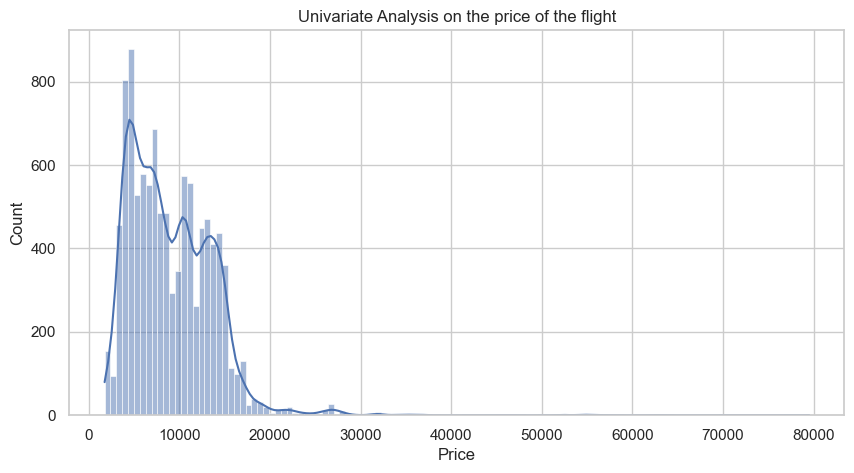

In [6692]:
### Perform Univariate Analysis on the price of the flight

plt.figure(figsize = (10,5))
sns.histplot(data['Price'], kde=True)
plt.title('Univariate Analysis on the price of the flight')
plt.show()

### OBSERVATIONS:

1.  The flight prices are rightly skewed.

2.  The price of the flight under this graph is usually coming under 3000 to 15000.

#### 2. Perform Univariate Analysis on Airline Count

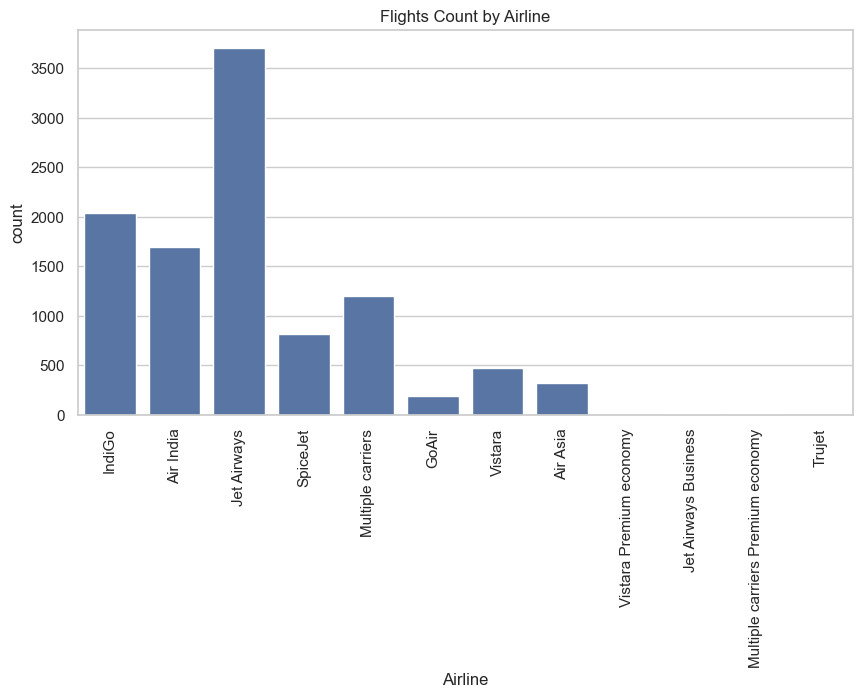

In [6693]:
plt.figure(figsize=(10,5))

sns.countplot(x = 'Airline', data = data)

plt.xticks(rotation=90)

plt.title('Flights Count by Airline')

plt.show()

### OBSERVATIONS:


1. From the above graph, we can see that the Maximum number of Airline taken by the customers is 'Jet Airways'.

### 3. Perform the Univariate Analysis on the 'Total_Stops' column

In [6694]:
data['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

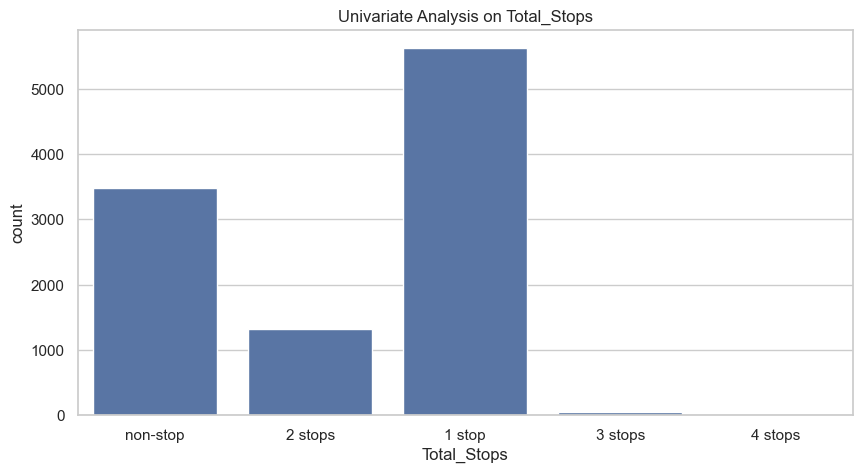

In [6695]:
plt.figure(figsize=(10,5))

### univariate analysis on Total_stops

sns.countplot(x = 'Total_Stops', data=data)

plt.title('Univariate Analysis on Total_Stops')

plt.show()

### OBSERVATIONS:

1. Maximum number of flights have taken place in 1 stop.

2. Most of the air flights has taken place in either 1 stop or non-stop.

### 4. Perform Bivariate Analysis on Airline Vs Price

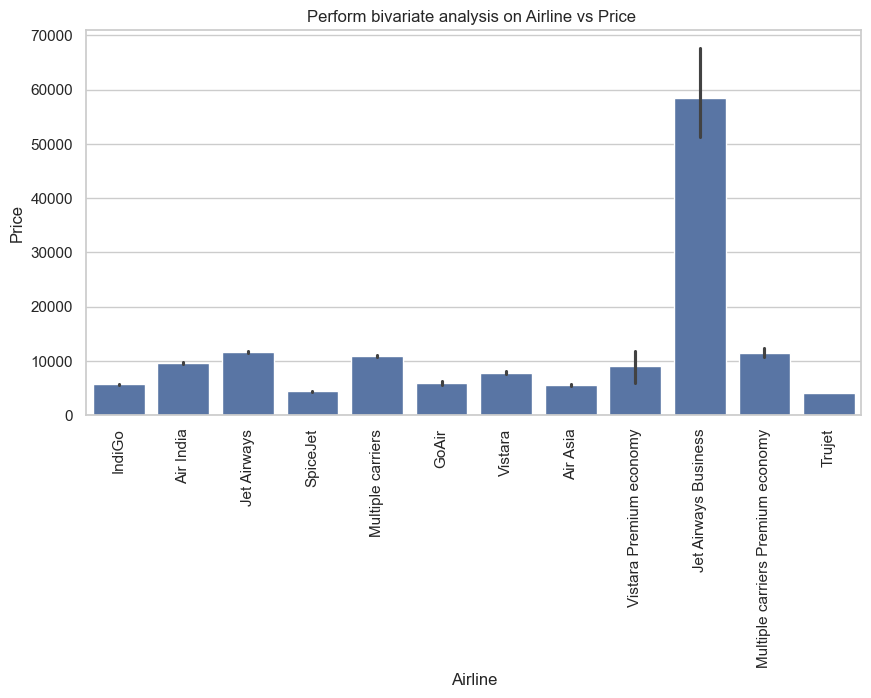

In [6696]:
plt.figure(figsize=(10,5))

### bivariate analysis on 'Airline' vs 'Price'

sns.barplot(x = 'Airline', y = 'Price', data = data)

### give the title to the graph

plt.xticks(rotation=90)

plt.title('Perform bivariate analysis on ''Airline'' vs ''Price'' ')

plt.show()

### OBSERVATIONS:

1. Jet Airways Business is the most costliest airlines that comes under the dataset.

2. Jet Airways Business, Jet Airways, Air India comes under high price airline.

3. Truejet comes under the cheapest airline in the given dataset.

### 5. Perform Bivariate Analysis on Source Location vs Price

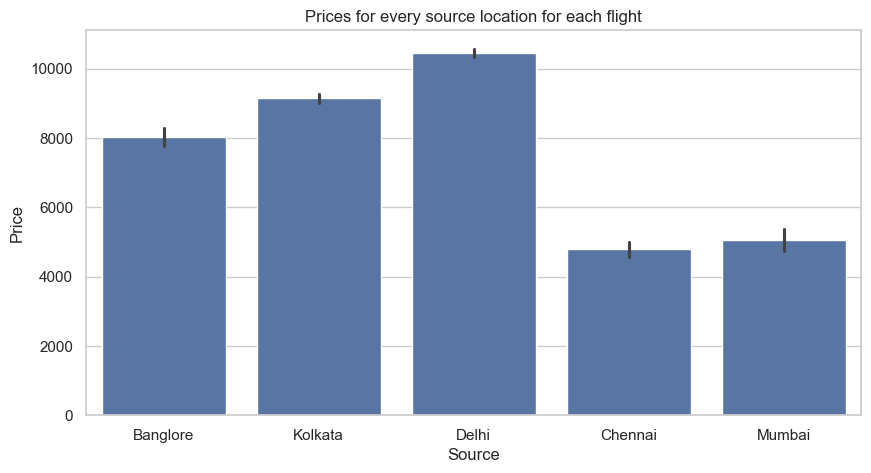

In [6697]:
plt.figure(figsize=(10,5))

sns.barplot(x='Source',y='Price',data=data)

plt.title('Prices for every source location for each flight')

plt.show()

### OBSERVATIONS:

1. Delhi is the most costliest Airline source location as maximum number of flights are being taken place from this location.

2. Kolkata is the second most expensive airline source location followed by Bangalore.

3. Chennai is the cheapest airline source location as minimum number of airline flights are being taken place from this location.

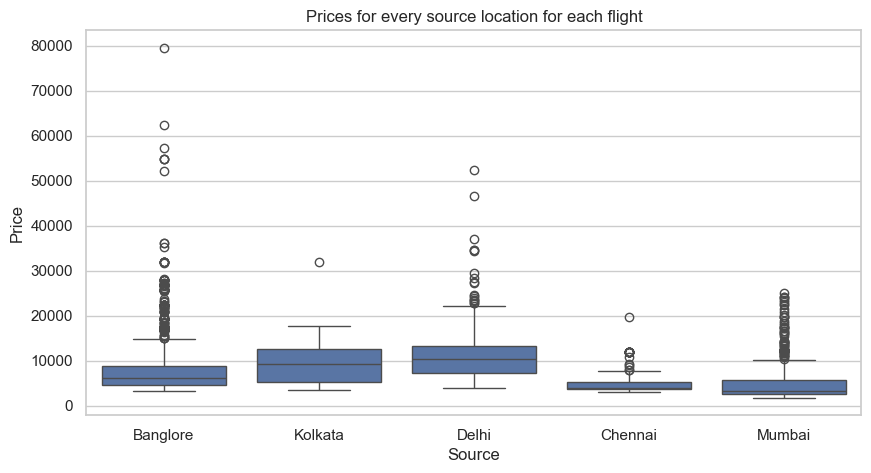

In [6698]:
plt.figure(figsize=(10,5))

sns.boxplot(x='Source', y = 'Price', data = data)


plt.title('Prices for every source location for each flight')

plt.show()

### OBSERVATIONS:

1. Delhi is the most costliest Airline source location as maximum number of flights are being taken place from this location.

2. Kolkata is the second most expensive airline source location followed by Bangalore.

3. Chennai is the cheapest airline source location as minimum number of airline flights are being taken place from this location.

### 6. Perform Bivariate Analysis on Destination Location vs Price

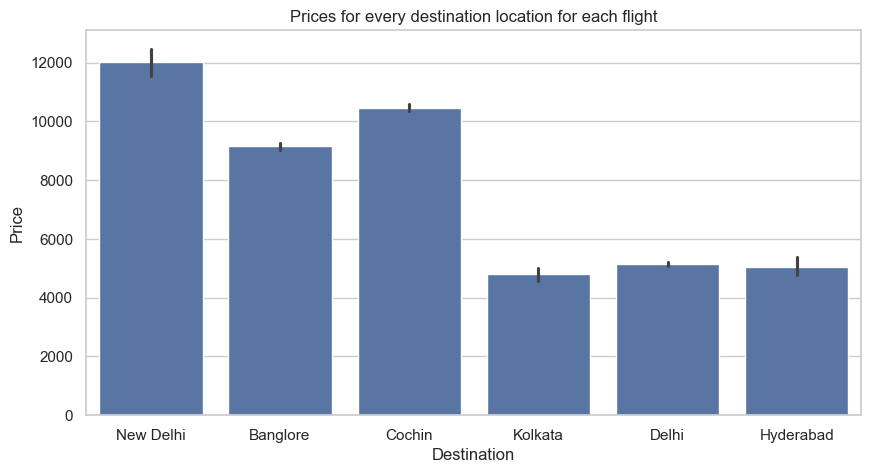

In [6699]:
plt.figure(figsize=(10,5))

### bivariate analysis on Destination Location vs Price

sns.barplot(x = 'Destination', y = 'Price', data = data)

plt.title('Prices for every destination location for each flight')

plt.show()

### OBSERVATIONS:

1. New Delhi is the most expensive airline destination location.

2. Cochin is the second most expensive airine destination location followed by Bangalore.

3. Kolkata is the cheapest airline destination loaction.

### 7. Perform Bivariate Analysis on Total Stops vs Price

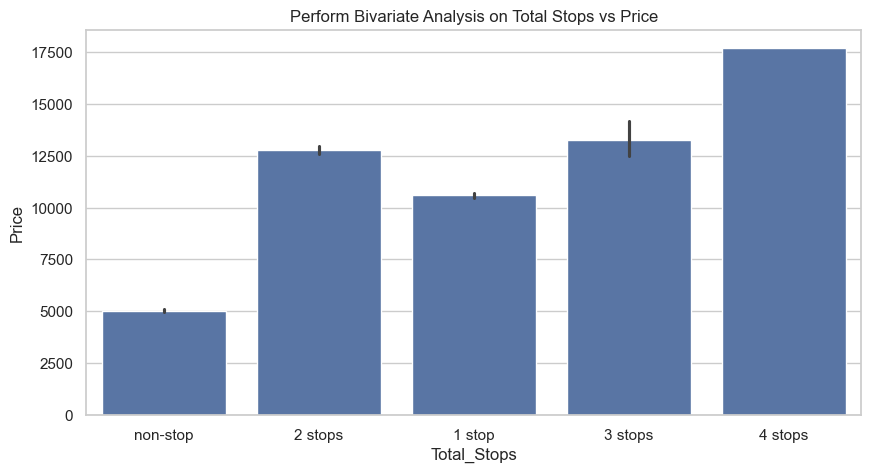

In [6700]:
plt.figure(figsize=(10,5))

sns.barplot(x = 'Total_Stops', y = 'Price', data = data)

plt.title('Perform Bivariate Analysis on Total Stops vs Price')

plt.show()

### OBSERVATIONS:

1. Flights with 4 stops is the most expensive and is having the highest average price rate as maximum number of customers are taking their flights in this stop.

2. Flights with non-stop is the cheapest as very few customers are taking their flights in this stop.

### Multivariate Analysis

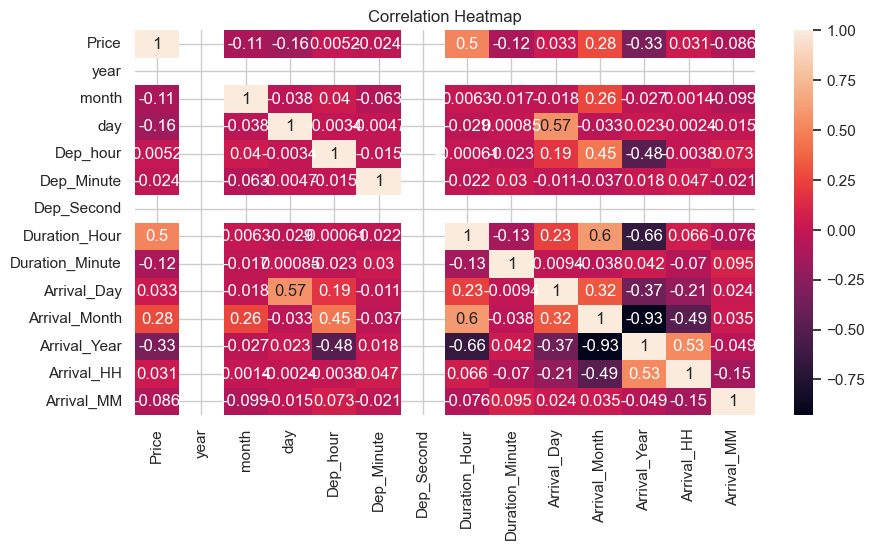

In [6701]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.title('Correlation Heatmap')
plt.show()

### OBSERVATIONS:

1. Arrival_Year, Arrival_HH, Arrival_MM correlation is highly positive.

2. Price , year, month correlation is highly negative.

### Outlier Detection

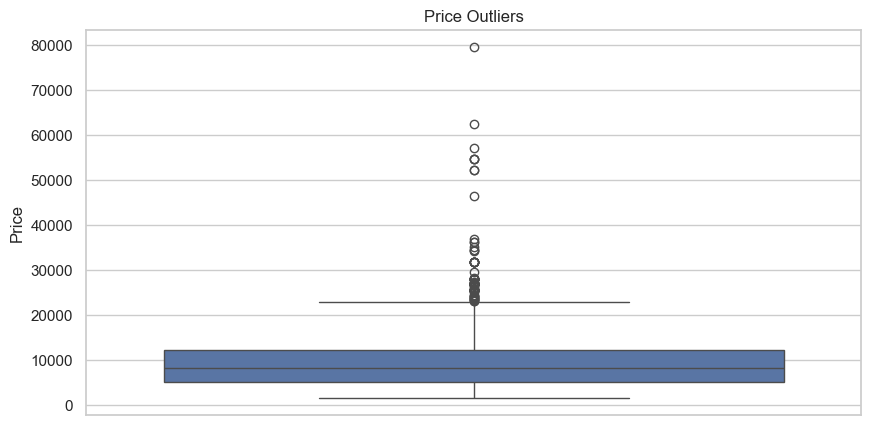

In [6702]:
plt.figure(figsize=(10,5))

sns.boxplot(data['Price'])


plt.title('Price Outliers')
plt.show()

### OBSERVATIONS:

1. Price is highly skewed.

2. There are large number of outliers in the Price column dataset.